# Explainable AI project - Part 3 : Evaluations
### Randomized Input Sampling for Explanation of Black-box Models : **RISE**
An implementation on [Imagenette](https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz) a subset of ImageNet with 10 classes.

### 1. Loading metrics given with each explanation methods

In [29]:
import matplotlib.pyplot as plt
from torchvision.transforms import transforms

In [30]:
import pickle

with open('example_class_dictionary.pkl', 'rb') as f:
    example_class_dict = pickle.load(f)

In [28]:
with open('explanation_dictionary.pkl', 'rb') as f:
    explanation_dict = pickle.load(f)

### 2. Evaluation

#### 2.1 ResNet-34

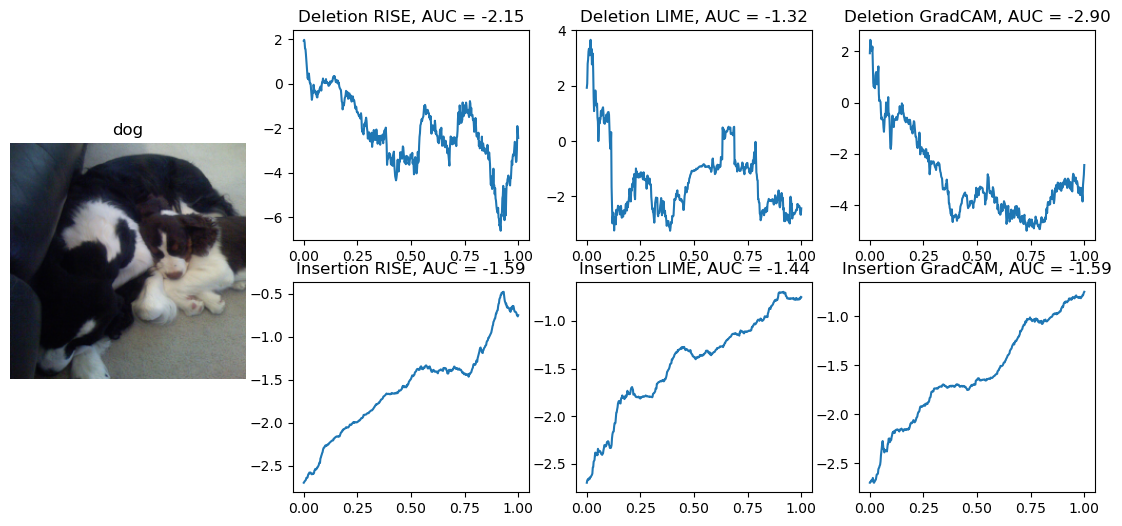

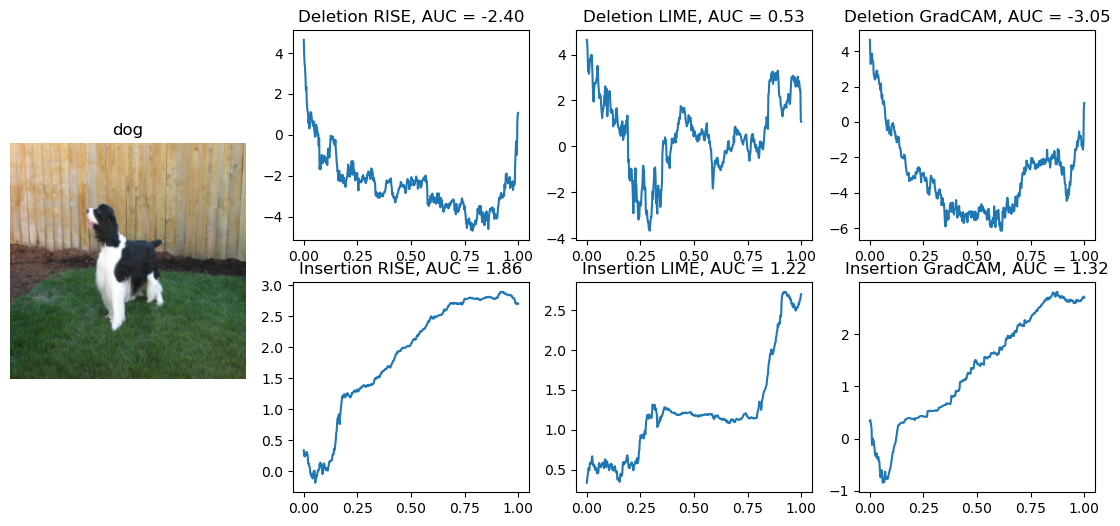

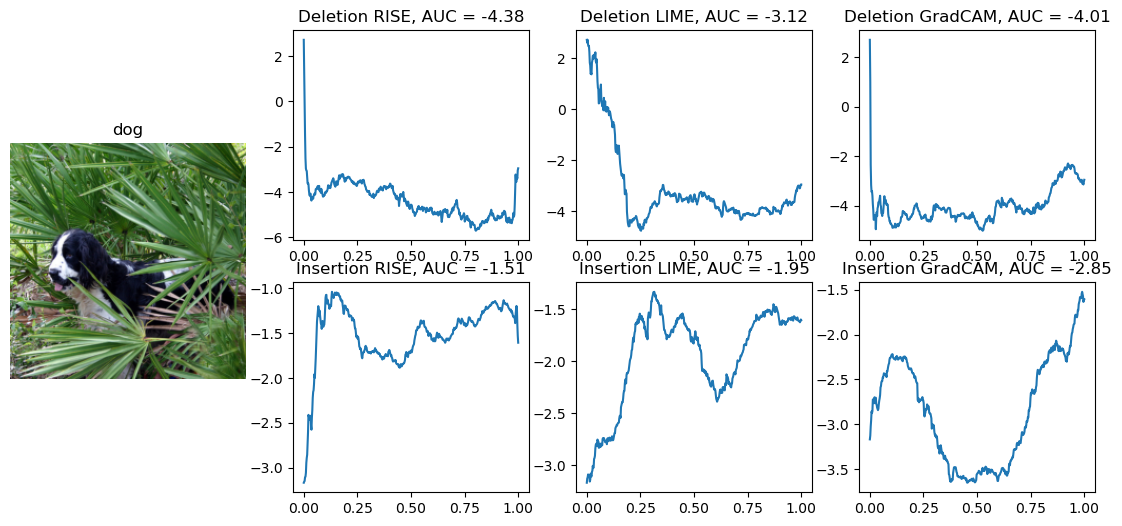

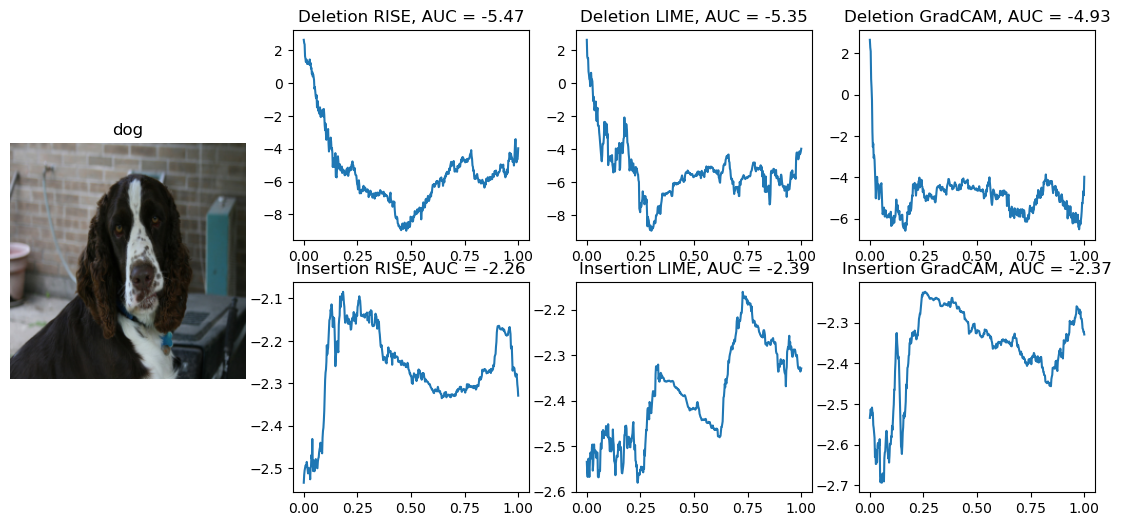

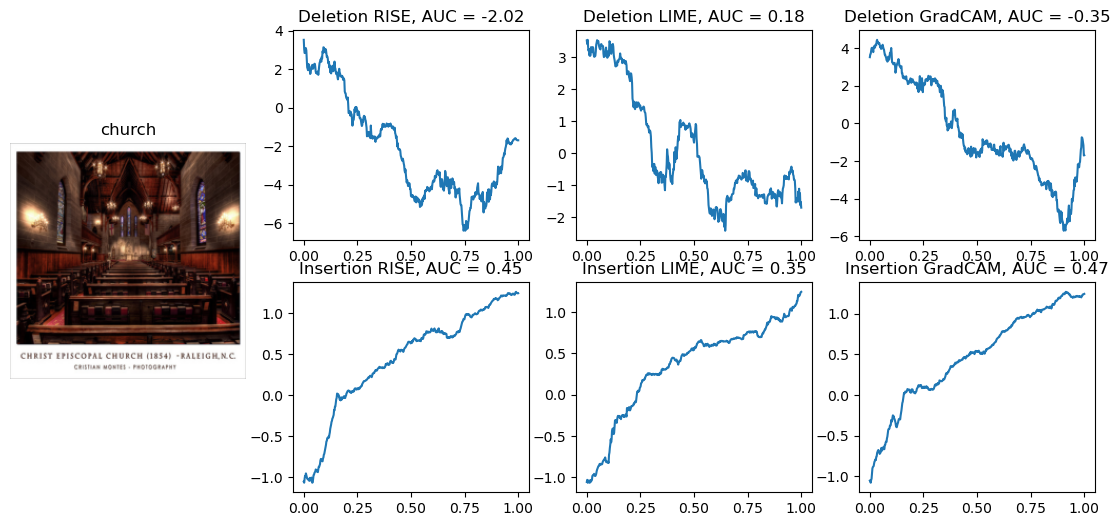

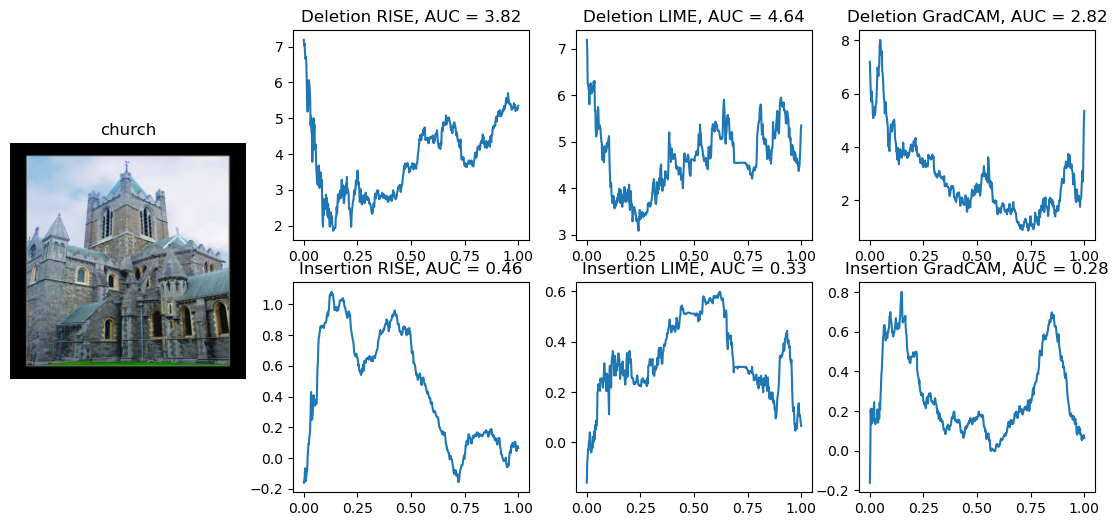

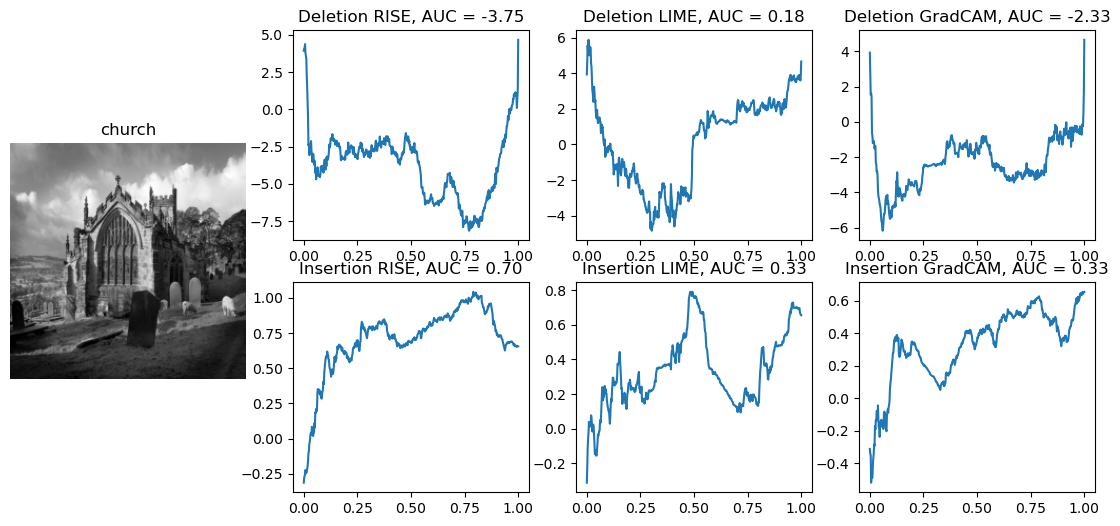

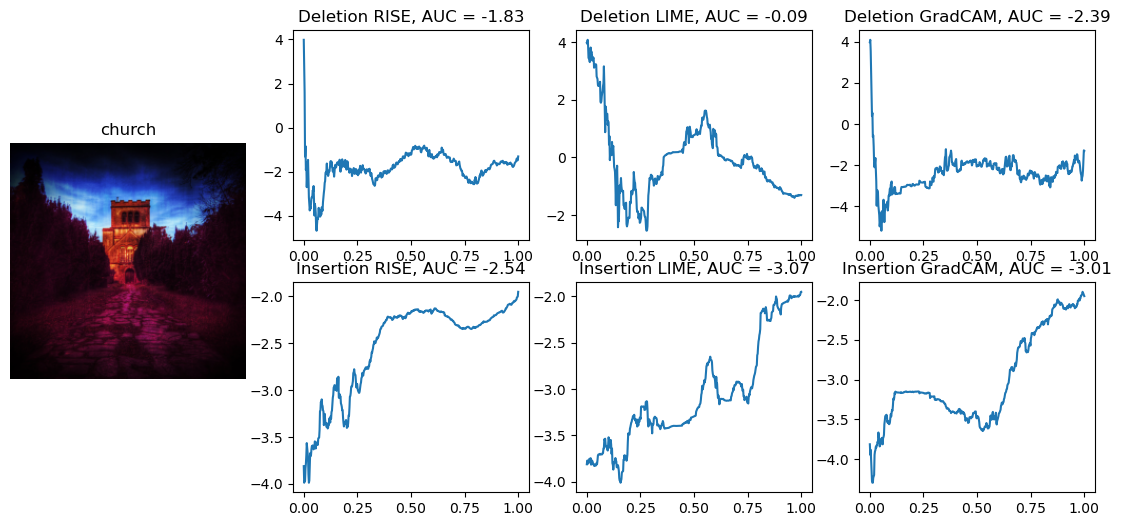

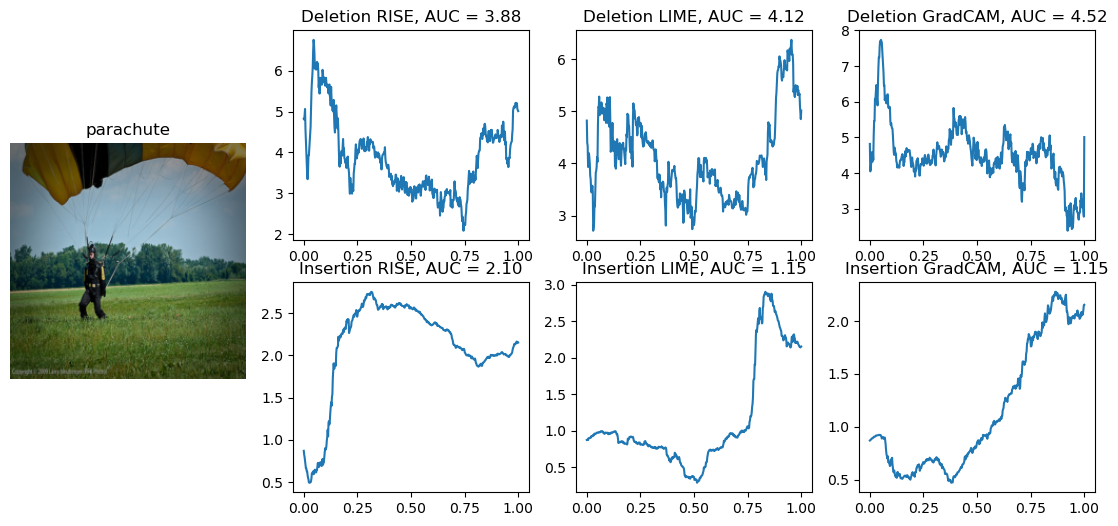

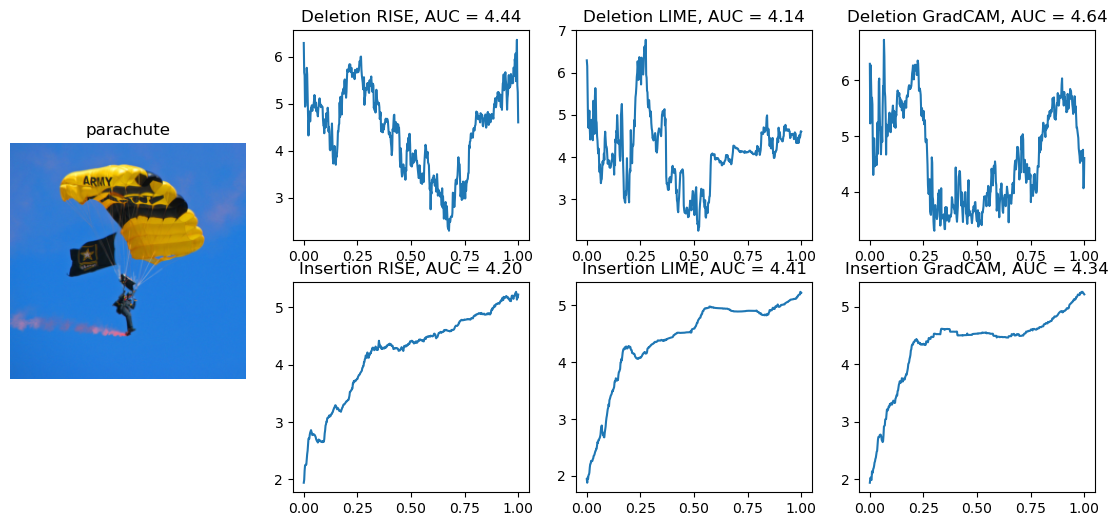

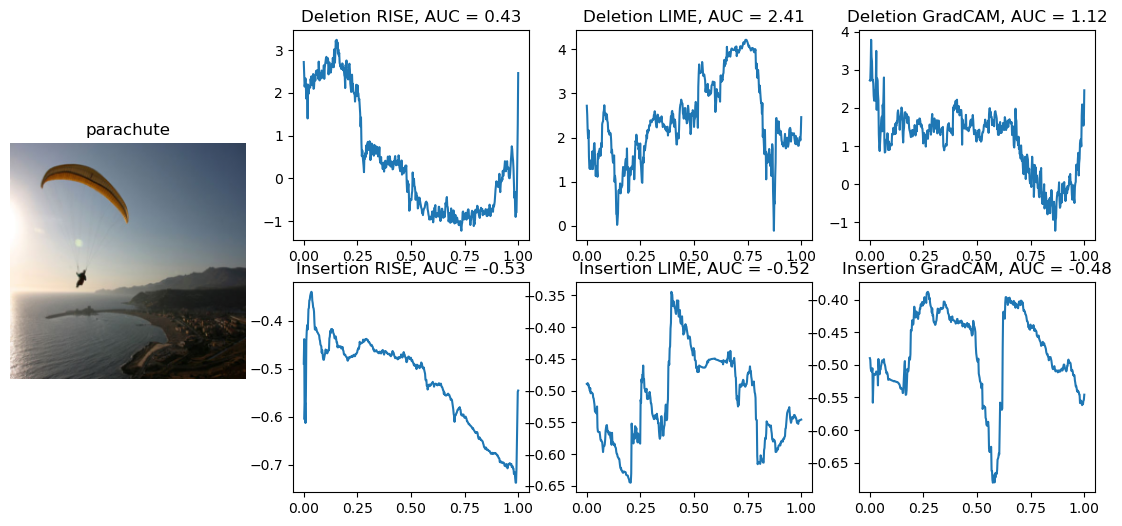

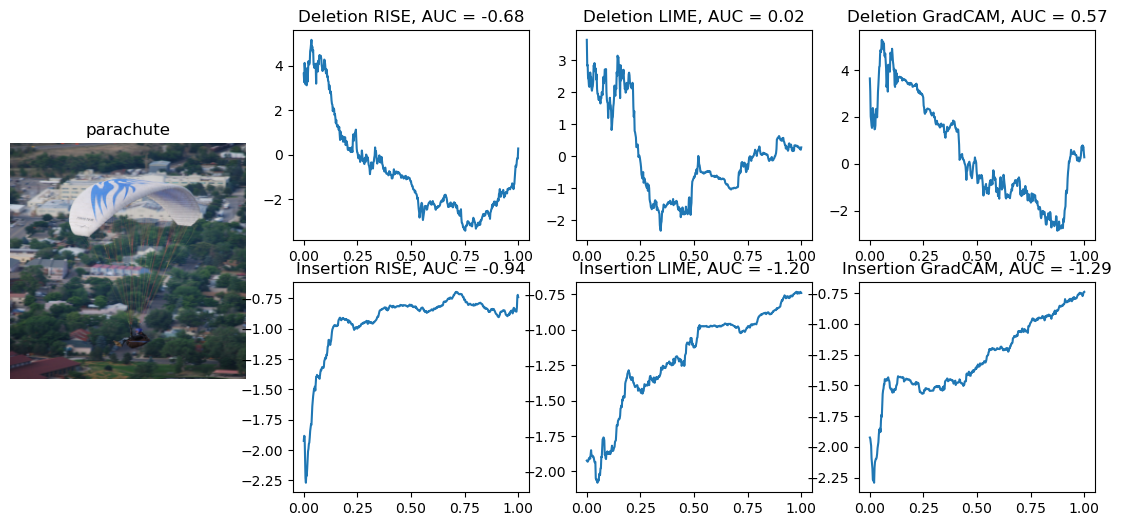

In [27]:
resnet_dict = explanation_dict['resnet']

means, stds = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

inv_normalize = transforms.Normalize(
   mean= [-m/s for m,s in zip(means, stds)],
   std= [1/s for s in stds]
)

for label in example_class_dict.keys() :
    label_dict = resnet_dict[label]
    for i, image in enumerate(example_class_dict[label]) :
        image_dict = label_dict[i]

        rise_metric = image_dict['rise']
        lime_metric = image_dict['lime']
        gradcam_metric = image_dict['gradcam']

        fig = plt.figure(figsize=(14, 6))
        gs = fig.add_gridspec(2,4)
        ax0 = fig.add_subplot(gs[:,0])
        ax_del_rise = fig.add_subplot(gs[0,1])
        ax_del_lime = fig.add_subplot(gs[0,2])
        ax_del_gradcam = fig.add_subplot(gs[0,3])
        ax_ins_rise = fig.add_subplot(gs[1,1])
        ax_ins_lime = fig.add_subplot(gs[1,2])
        ax_ins_gradcam = fig.add_subplot(gs[1,3])


        ax0.imshow(inv_normalize(image).permute(1, 2, 0).numpy())
        ax0.set_title(label)
        ax0.axis('off')

        metrics = [rise_metric, lime_metric, gradcam_metric]
        axs = [(ax_del_rise, ax_ins_rise),(ax_del_lime, ax_ins_lime), (ax_del_gradcam, ax_ins_gradcam)]
        metric_name = ['RISE', 'LIME', 'GradCAM']
        i=0
        for metric, ax in zip(metrics, axs) :

            # Deletion metric plot
            ax[0].plot(metric['deletion']['x_axis'], metric['deletion']['scores'])
            ax[0].set_title('Deletion ' +metric_name[i]+', AUC = {:.2f}'.format(metric['deletion']['auc']))

            # Insertion metric plot
            ax[1].plot(metric['insertion']['x_axis'], metric['insertion']['scores'])
            ax[1].set_title('Insertion ' +metric_name[i]+', AUC = {:.2f}'.format(metric['insertion']['auc']))

            i+=1

        plt.show()

        

#### 2.2 MobileOne

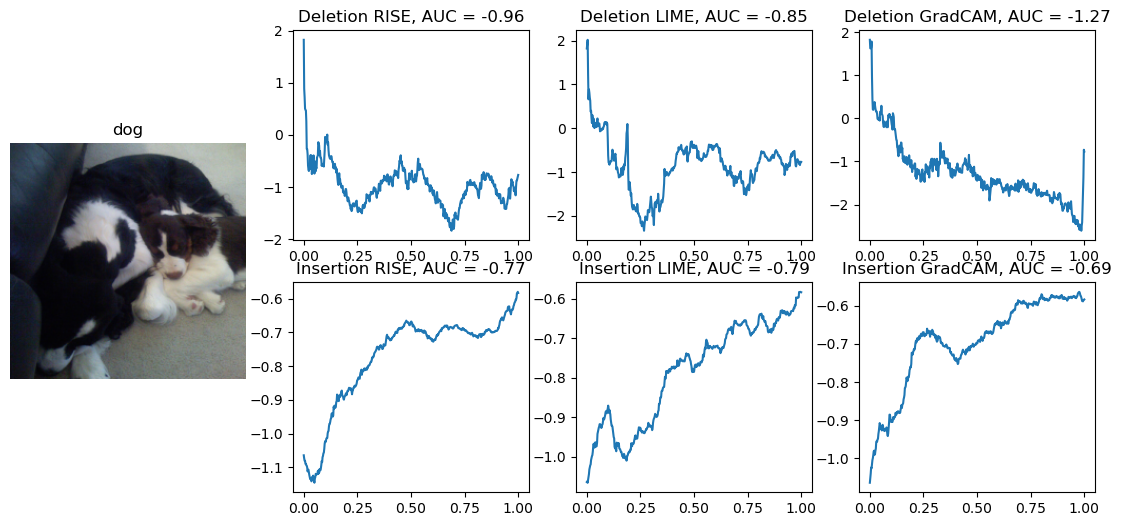

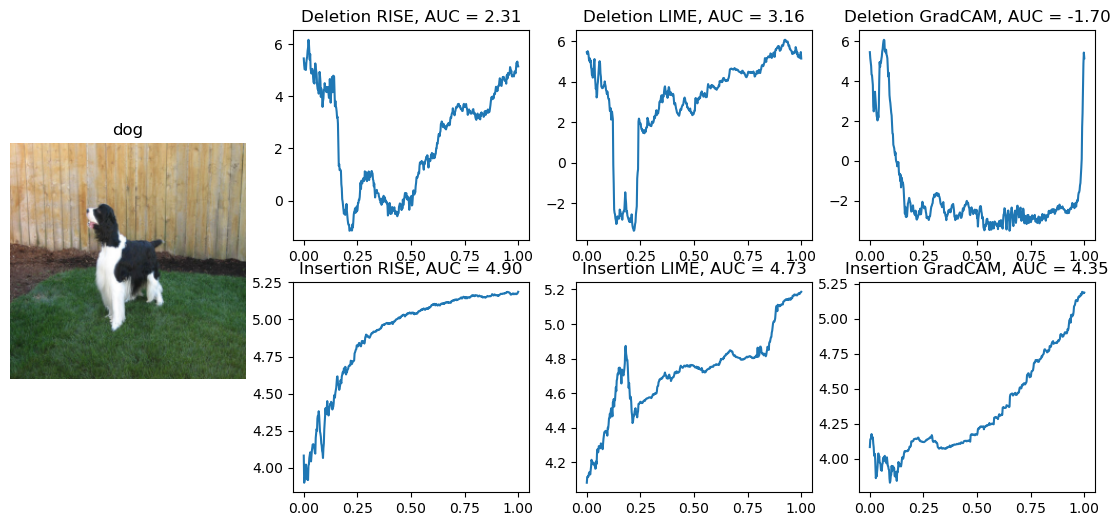

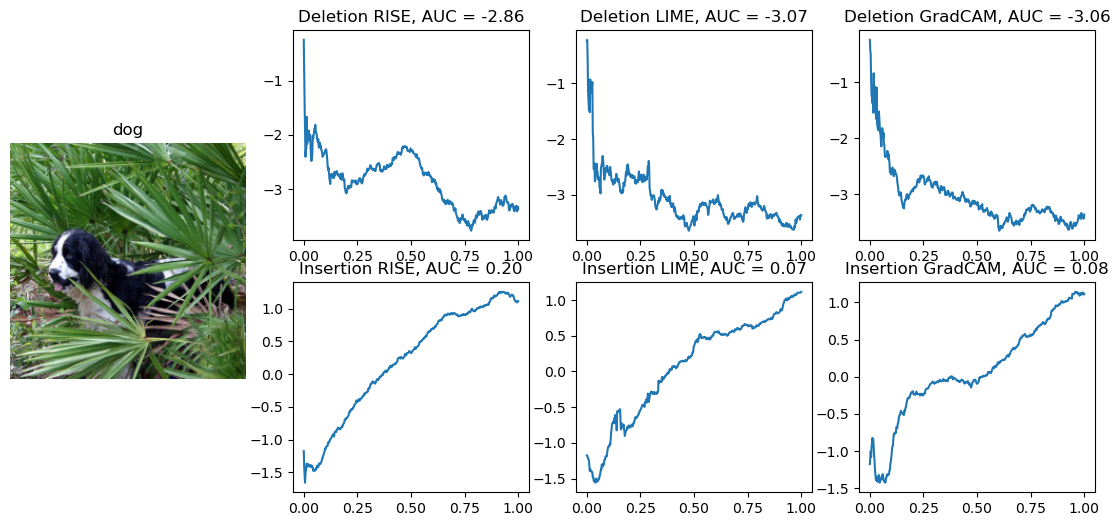

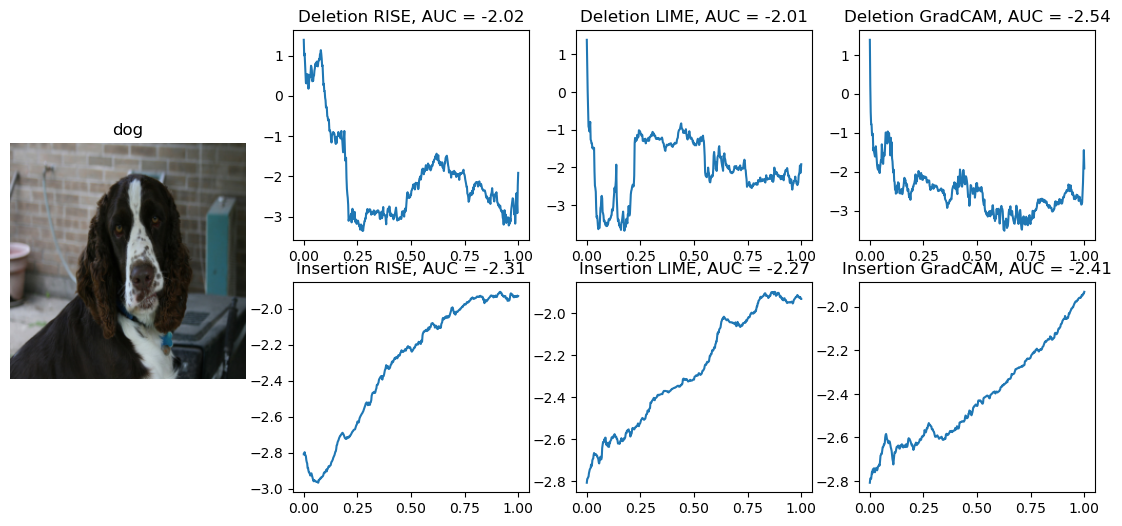

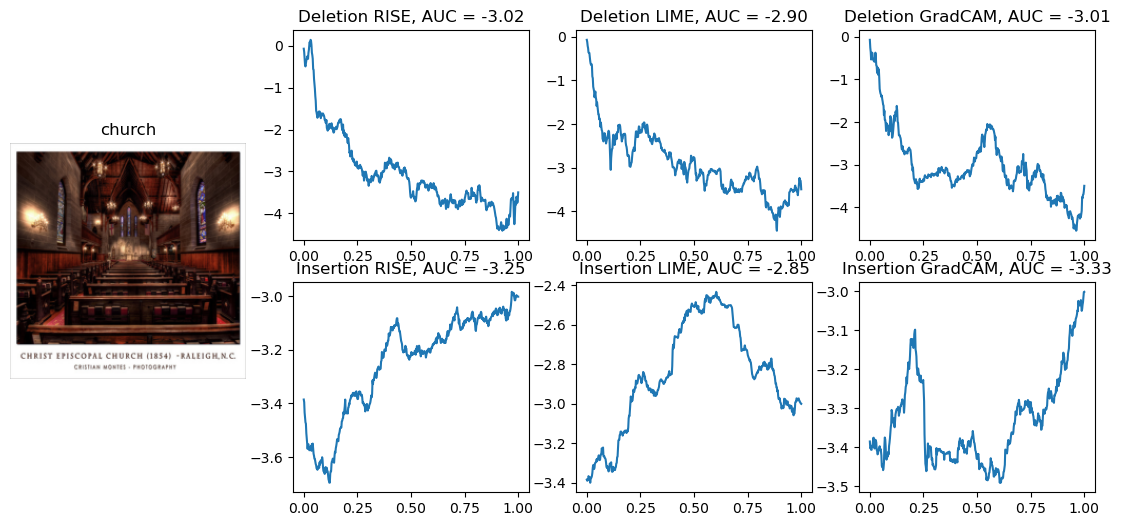

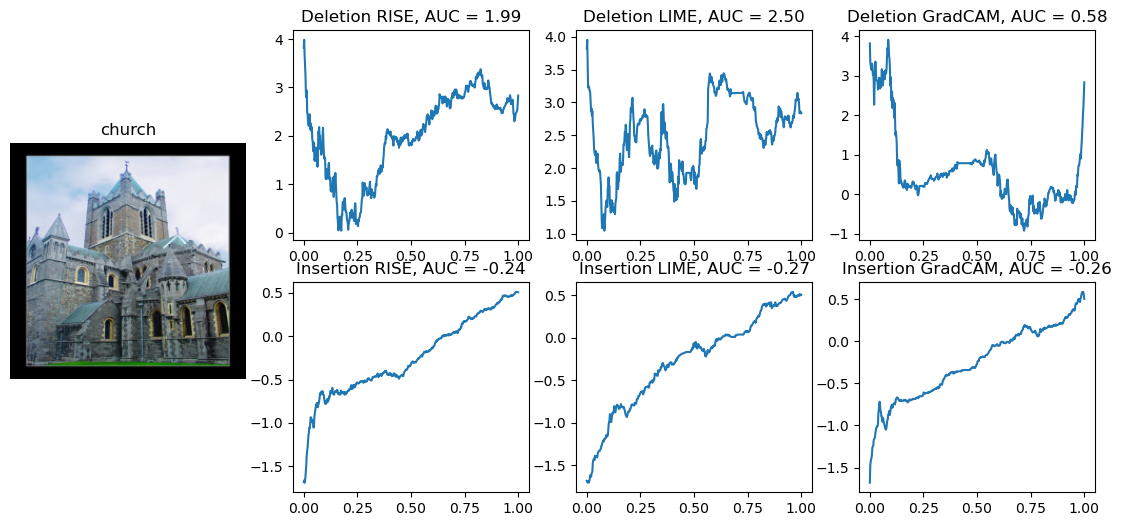

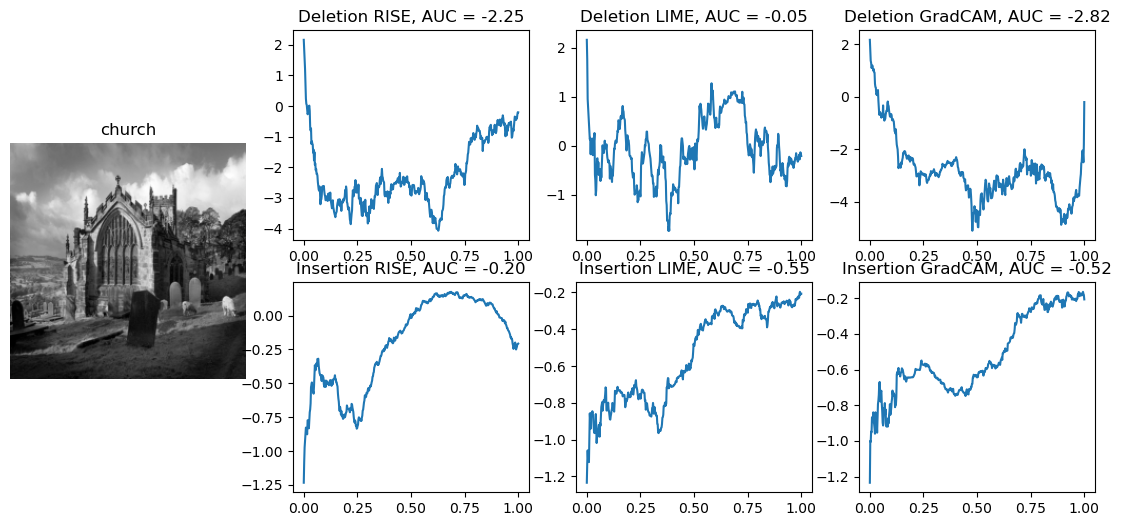

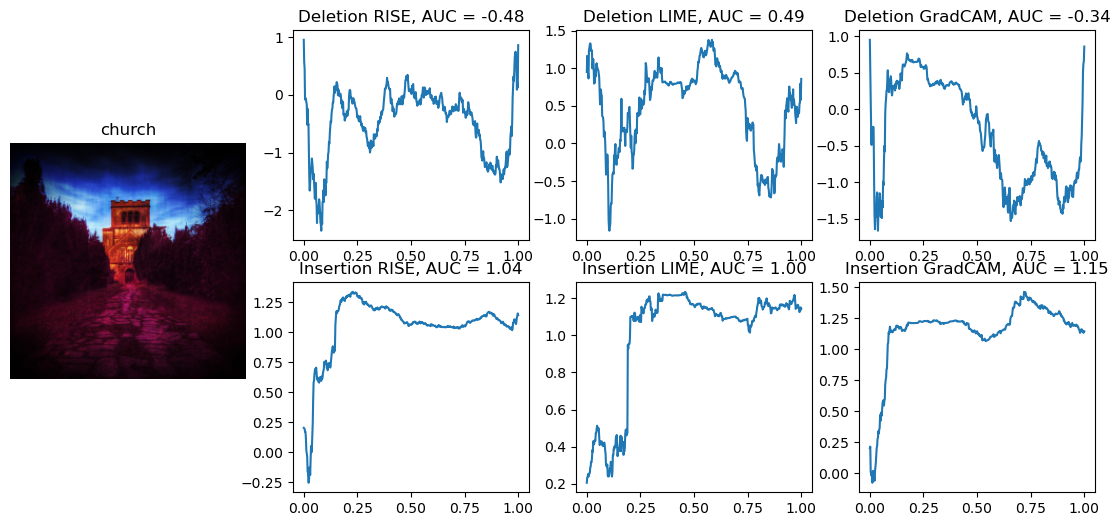

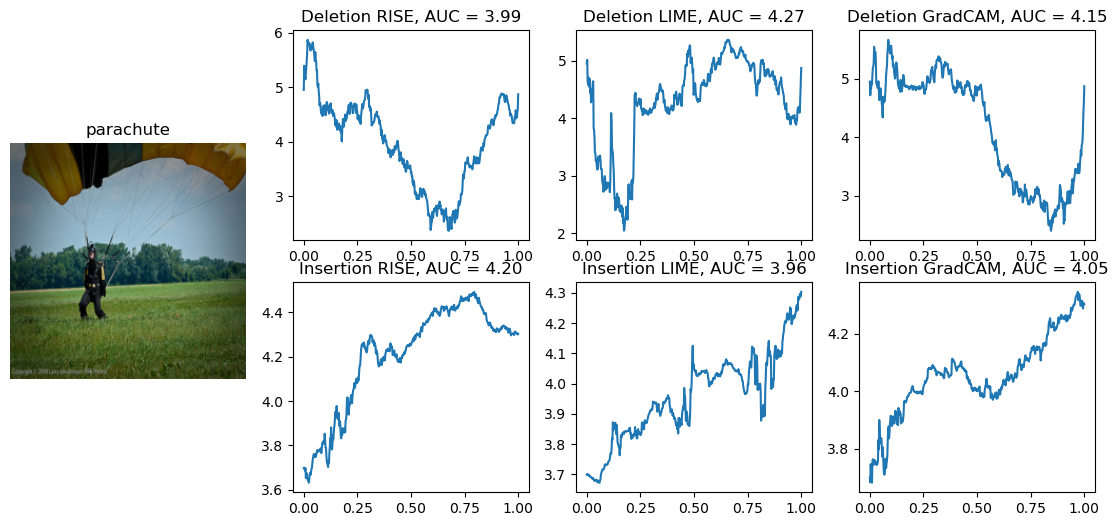

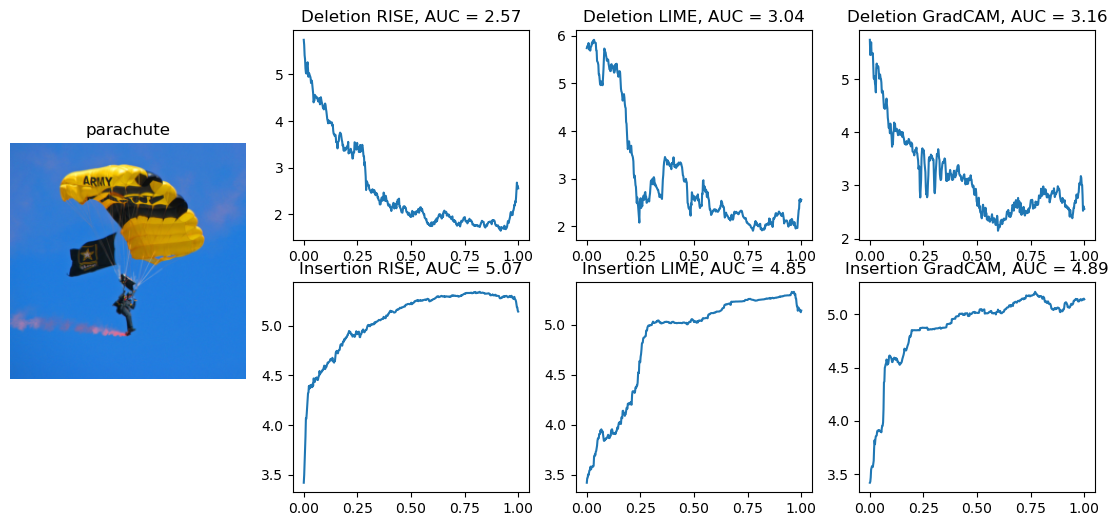

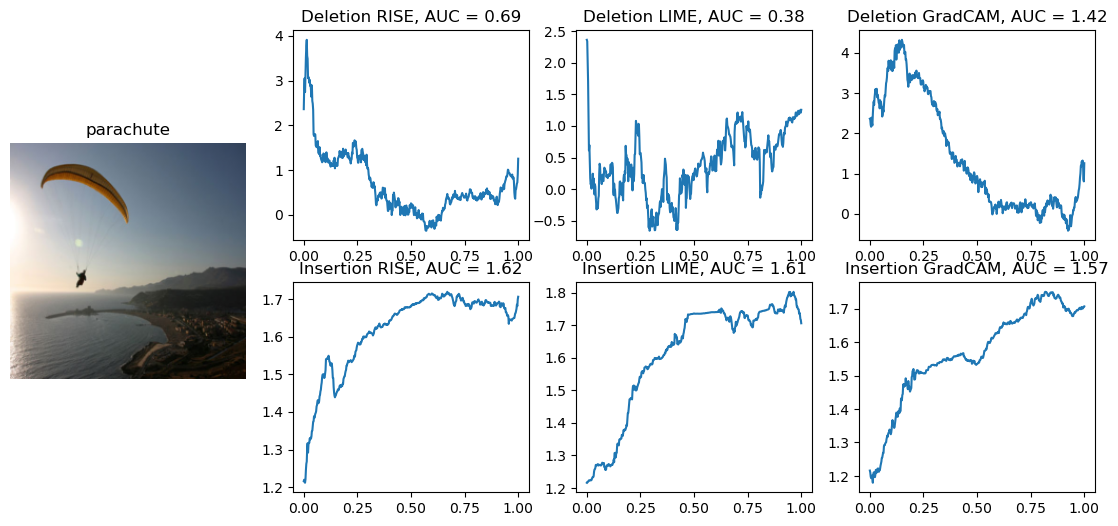

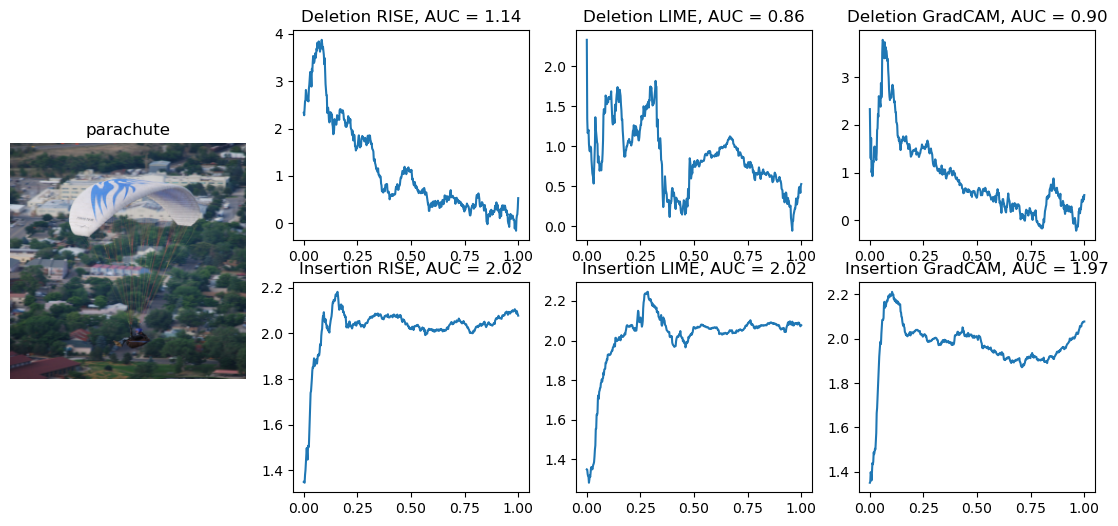

In [31]:
mobileone_dict = explanation_dict['mobileone']

means, stds = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

inv_normalize = transforms.Normalize(
   mean= [-m/s for m,s in zip(means, stds)],
   std= [1/s for s in stds]
)

for label in example_class_dict.keys() :
    label_dict = mobileone_dict[label]
    for i, image in enumerate(example_class_dict[label]) :
        image_dict = label_dict[i]

        rise_metric = image_dict['rise']
        lime_metric = image_dict['lime']
        gradcam_metric = image_dict['gradcam']

        fig = plt.figure(figsize=(14, 6))
        gs = fig.add_gridspec(2,4)
        ax0 = fig.add_subplot(gs[:,0])
        ax_del_rise = fig.add_subplot(gs[0,1])
        ax_del_lime = fig.add_subplot(gs[0,2])
        ax_del_gradcam = fig.add_subplot(gs[0,3])
        ax_ins_rise = fig.add_subplot(gs[1,1])
        ax_ins_lime = fig.add_subplot(gs[1,2])
        ax_ins_gradcam = fig.add_subplot(gs[1,3])


        ax0.imshow(inv_normalize(image).permute(1, 2, 0).numpy())
        ax0.set_title(label)
        ax0.axis('off')

        metrics = [rise_metric, lime_metric, gradcam_metric]
        axs = [(ax_del_rise, ax_ins_rise),(ax_del_lime, ax_ins_lime), (ax_del_gradcam, ax_ins_gradcam)]
        metric_name = ['RISE', 'LIME', 'GradCAM']
        i=0
        for metric, ax in zip(metrics, axs) :

            # Deletion metric plot
            ax[0].plot(metric['deletion']['x_axis'], metric['deletion']['scores'])
            ax[0].set_title('Deletion ' +metric_name[i]+', AUC = {:.2f}'.format(metric['deletion']['auc']))

            # Insertion metric plot
            ax[1].plot(metric['insertion']['x_axis'], metric['insertion']['scores'])
            ax[1].set_title('Insertion ' +metric_name[i]+', AUC = {:.2f}'.format(metric['insertion']['auc']))

            i+=1

        plt.show()


#### 2.3. Analysis of the metrics

First, we need to recall that :
* for **deletion metric** : the lower Area Under the Curve (AUC) represents the importance map that covers really the most important parts, it is a way to measure the precision.
* for **insertion metric** : the higher Area Under the Curve (AUC) represents the importance map that covers only the most important parts, it is a way to measure the recall.

We can see that, in average, compared to GradCAM and LIME, RISE has better performances on deletion and mainly on insertion metrics. Note that our evaluation does not covers all the classes and takes a very few examples.

However, at this scale, it means that RISE covers little better the real important zones on the images and also it is less likeky to mark non influent zones as importants. Those two factors make RISE a good method to explain model, furthermore it does not require any knowledge on the model as GradCAM needs.